# Part 1: Loading and Visualizing Data

## 1-1 Load Training Data

In [1]:
import scipy.io

data = scipy.io.loadmat("ex3data1.mat")
X = data["X"]
y = data["y"]

## 1-2 Randomly select 1 data points to display

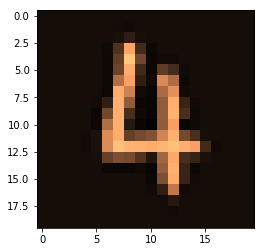

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

# m:  the number  of train data 
# n:  the number of  input feature
m, n = X.shape

rand_indices = random.sample(range(0, m+1), m)
sel = X[rand_indices[0 : 1], :].reshape(20, 20)
tempsel = np.zeros([20, 20])
k = 0
for i in range(0, 20):
    for j in range(0, 20):
        tempsel[j, i] = sel[i, j]
plt.imshow(tempsel, cmap=plt.cm.copper)
plt.show()

# Part 2: Vectorize Logistic Regression

## 2-1 The implementation of sigmoid function

In [4]:
def sigmoid(z):
    return 1 / (1 +np.exp(-z))

## 2-1 The implementations of Cost and Gradient Funciton for Regularized Logistic

In [5]:
def compute_cost_reg(theta, X, y, ilambda=0):
    m, n = X.shape # the number of training example and the number of features.
    temp_theta = theta[1:]
    J = (-1/m) * (np.dot(y.T, np.log(sigmoid(np.dot(X, theta)))) + np.dot((1-y).T, np.log(1-sigmoid(np.dot(X, theta))))) + (ilambda/(2*m))*np.dot(temp_theta.T, temp_theta)
    return J
   
def compute_grad_reg(theta, X, y, ilambda):
    m, n = X.shape # the number of tra(ining e/(2*m))xample and the number of features
    temp_theta = theta[1:]
    grad = np.zeros([n, 1])
    grad[0] = (1/m) * (np.dot(X[:, 0:1].T, (sigmoid(np.dot(X, theta))-y)))
    grad[1:] = (1/m) * (np.dot(X[:, 1:].T, (sigmoid(np.dot(X, theta))-y))) + (ilambda/m)*temp_theta
    return grad

## 2-2 Test lrCostFunction

In [6]:
print("Testing lrCostFunction with regularization")

theta_t = np.array([[-2, -1, 1, 2]]).T
X_t = np.hstack((np.ones([5, 1]), np.linspace(1, 15, num=15).reshape(3, 5).T/10))
y_t = np.array([[1, 0, 1, 0, 1]]).T
lambda_t = 3
J = compute_cost_reg(theta_t, X_t, y_t, lambda_t)
grad = compute_grad_reg(theta_t, X_t, y_t, lambda_t)
print('Cost: ', J);
print('Expected cost: 2.534819');
print('Gradients:');
print( grad);
print('Expected gradients:');
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');

Testing lrCostFunction with regularization
Cost:  [[2.5348194]]
Expected cost: 2.534819
Gradients:
[[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003



# Part 3: One-vs-All Training

## 3-1 The implementation of ioptimize function

In [7]:
from scipy import optimize
def ioptimize(X, y, initial_theta, ilambda, iters=100):
    result = optimize.minimize(compute_cost_reg, initial_theta, args=(X, y, ilambda), method='BFGS', options={"maxiter": iters, "disp": True})
    theta = np.array([result.x])
    return theta

## 3-2 The implementation of oneVsAll function

In [8]:
from scipy import optimize

def oneVsAll(X, y, num_labels, ilambda):
    m, n = X.shape
    all_theta = np.zeros([num_labels, n+1])
    X = np.hstack((np.ones([m, 1]), X))
    for i in range(0, num_labels):
        initial_theta = np.zeros([n+1, 1])
        pos_index,_  = np.where(y==i+1)
        temp_y = np.zeros([m, 1])
        temp_y[pos_index, 0:] = 1
        all_theta[i, :] = ioptimize(X, temp_y, initial_theta, ilambda, 50)
    return all_theta

## 3-3 initial parameters

In [9]:
ilambda = 0.1
input_layer_size  = 400
num_labels = 10
all_theta = oneVsAll(X, y, num_labels, ilambda)

         Current function value: 0.023312
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.068360
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.071812
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.050061
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.075951
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.032799
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.045323
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.093309

# Part 4: Predict for One-Vs-All 

## 4-1 The implementation of predictOneVsAll funcion

In [10]:
def predictOneVsAll(theta, X):
    # the number of labels
    number_labels, _  = theta.shape
    # the number of example and  feature: m, n
    m, n = X.shape
    p = sigmoid(np.dot(X, theta))
    _, p = np.where(p==np.array([np.max(p, axis=1)]).T)
    return p +1

## 4-2 Test for predict function

In [11]:
from sklearn.metrics import classification_report
pred = predictOneVsAll(all_theta.T, np.hstack((np.ones([m, 1]), X)));
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97       500
           2       0.93      0.90      0.91       500
           3       0.93      0.90      0.92       500
           4       0.94      0.94      0.94       500
           5       0.90      0.90      0.90       500
           6       0.95      0.97      0.96       500
           7       0.94      0.93      0.94       500
           8       0.90      0.91      0.91       500
           9       0.90      0.91      0.90       500
          10       0.97      0.99      0.98       500

   micro avg       0.93      0.93      0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000

